<h1 align="center">Internshala's Data Science Specialization </h1><br>

## Course Project Report - Salary Prediction for Hiring New Employees

<div  style="font-size: 16px">
Organization: <b>Internshala</b><br>
Course: <b>Machine Learning</b><br>
Project: <b>Salary Prediction for Hiring New Employees</b><br>
Programming Language: <b>Python</b><br>
Submitted by: <b>Lavkush Singh</b>
</div>

### Problem Statement

**The project aims at building a model to accurately predict thee salary of newly hired employees**

### Task: Reading and Understanding the data

In [171]:
# Importing required libraries

import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import dabl
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [61]:
# settings to display all columns

pd.set_option("display.max_columns", None)
pd.options.display.max_rows = None

In [2]:
# reading the data

emp_data = pd.read_csv("Datasets/ML case Study.csv")
emp_colg_data = pd.read_csv('Datasets/Colleges.csv')
emp_city_data = pd.read_csv("Datasets/cities.csv")

In [3]:
emp_data.head()   # viewing first few observations of the employee dataset

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
emp_colg_data.head()  # viewing first few observations of the employee's college dataset

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
emp_city_data.head() # viewing first few observations of the employee's city dataset

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


##### Since the column names of the dataframe "emp_city_data" are not correctly spelt and they contain spaces, modifying them as below:

In [6]:
emp_city_data = emp_city_data.rename(columns = {"Metrio City": "metro_city", "non-metro cities": "non_metro_city"})
emp_city_data.head()

,metro_city,non_metro_city
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [7]:
emp_data.info()   # getting information of the employee data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [8]:
emp_colg_data.info() # getting information of the employee's college data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  22 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  19 non-null     object
dtypes: object(3)
memory usage: 800.0+ bytes


In [9]:
emp_city_data.info() # getting information of the employee's city data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   metro_city      9 non-null      object
 1   non_metro_city  8 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


##### Since "emp_colg_data" & "emp_city_data" have missing values, filling them with "NA" (as they are non numeric)

In [10]:
emp_colg_data = emp_colg_data.fillna(value = "NA")
emp_colg_data.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [11]:
emp_colg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  28 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  28 non-null     object
dtypes: object(3)
memory usage: 800.0+ bytes


In [12]:
emp_city_data = emp_city_data.fillna(value="NA")
emp_city_data.head()

,metro_city,non_metro_city
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [13]:
emp_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   metro_city      9 non-null      object
 1   non_metro_city  9 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [14]:
emp_data.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


##### creating a function to modify the column names (as few have spaces, it will be a problem for statsmodel's linear model)

In [15]:
def colname_modify(cols):
    """
    This function takes the column names and returns the modified version (all lower case, and spaces replaced with '_')
    """
    cols = list(cols)
    for i in range(len(cols)):
        cols[i] = cols[i].lower().replace(" ", "_")
    return cols         

In [16]:
print(colname_modify(emp_data.columns))  # testing the function "colname_modify"

['college', 'city', 'role', 'previous_ctc', 'previous_job_change', 'graduation_marks', 'exp_(month)', 'ctc']


In [17]:
# updated/modified the column names for "emp_data" & "emp_colg_data"

emp_data.columns = colname_modify(emp_data.columns)
emp_colg_data.columns = colname_modify(emp_colg_data.columns)

In [18]:
emp_colg_data.head()

,tier_1,tier_2,tier_3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [19]:
emp_data.head()

,college,city,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


##### As college tier information is given in another dataset "emp_colg_data", creating new feature in employee data using the same

In [20]:
emp_data['tier'] = emp_data['college'].apply(lambda x: emp_colg_data.columns[(x == emp_colg_data).any()][0])
emp_data.head()

,college,city,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,tier_2
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,tier_2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,tier_3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,tier_3
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,tier_1


##### As employee's city information is given in another dataset "emp_city_data", creating new feature in employee data using the same

In [21]:
emp_data['city_if_metro'] = emp_data['city'].apply(lambda x: emp_city_data.columns[(x == emp_city_data).any()][0])
emp_data.head()

,college,city,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier,city_if_metro
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,tier_2,non_metro_city
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,tier_2,non_metro_city
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,tier_3,non_metro_city
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,tier_3,non_metro_city
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,tier_1,non_metro_city


##### Since city is given, I am interested to know the employee's distribution among different state. Hence, a function is created to convert the city into corresponding state

In [28]:
def read_state(city):
    """
    Convert cities and returns the corresponding Indian state
    """
    # defining the variable which has all the Indian state names.
    indian_states = ("Andhra Pradesh","Arunachal Pradesh ","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu and Kashmir","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","Andaman and Nicobar Islands","Chandigarh","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep","New Delhi","Delhi","Puducherry")
    
    geolocator = Nominatim(user_agent="google") #user agent can be any user agent 
    location = geolocator.geocode(city, language="en",  timeout=None) #specified the language as some countries are in other lanaguages
    result = location.address.split(',') #split the string based on comma, as this result will have lot of information (state, country, pincode, locality etc)
    
    for res in result:    # for all the elements of the resultset
        if res.strip() in indian_states: # if any of the element matches with the indian state name
            print("State found!")        # print that state is found, this print statement is for verbose purpose
            return res.strip()           # return the found Indian state name
    print("State not found!")            # print that state is not found, this print statement is for verbose purpose
    return "NA"                          # return "NA" if no state is found

In [23]:
read_state('Mahipalpur')   # testing the function "read_state"

'New Delhi'

In [24]:
# testing the function "read_state" using apply function for first few observations

emp_data['city'].head(10).apply(lambda x: read_state(x)) 

0    West Bengal
1      Rajasthan
2    West Bengal
3      Rajasthan
4    West Bengal
5    Maharashtra
6             NA
7          Delhi
8     Tamil Nadu
9    Maharashtra
Name: city, dtype: object

In [29]:
# applying the function "read_state" to the employee data, to find out the state using the city information

emp_data['state'] = emp_data['city'].apply(lambda x: read_state(x)) 

State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
S

State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State fou

State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State fou

In [30]:
emp_data.head()  # 'state' is the last column of this dataframe

,college,city,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier,city_if_metro,state
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,tier_2,non_metro_city,West Bengal
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,tier_2,non_metro_city,Rajasthan
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,tier_3,non_metro_city,West Bengal
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,tier_3,non_metro_city,Rajasthan
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,tier_1,non_metro_city,West Bengal


In [31]:
# moving the 'state' column to position 2, right after 'city' column
state_col = emp_data.pop('state')
emp_data.insert(2,'state',state_col)

In [32]:
emp_data.head()

,college,city,state,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier,city_if_metro
0,SVNIT Surat,Asansol,West Bengal,Manager,55523.0,3,66,19,71406.58,tier_2,non_metro_city
1,NIT Bhopal,Ajmer,Rajasthan,Executive,57081.0,1,84,18,68005.87,tier_2,non_metro_city
2,"IEM, Kolkata",Rajpur Sonarpur,West Bengal,Executive,60347.0,2,52,28,76764.02,tier_3,non_metro_city
3,"KIIT, Bhubaneswar",Ajmer,Rajasthan,Executive,49010.0,2,81,33,82092.39,tier_3,non_metro_city
4,DTU,Durgapur,West Bengal,Executive,57879.0,4,74,32,73878.10,tier_1,non_metro_city


### Task: Data Exploration

In [64]:
emp_data.describe()

,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [62]:
print(emp_data['college'].value_counts()) # Max employees (tot 40) are from KIIT, Bhubaneswar, & least (9) are from VNIT Nagpur

KIIT, Bhubaneswar                                 40
Manipal Main Campus                               36
IIT Ropar                                         36
VIT Vellore                                       36
BITS Pilani (Goa Campus)                          36
BMS College, Bangalore                            35
IIT Madras                                        35
Jadavpur University                               34
MSIT, Delhi                                       34
IIT Delhi                                         33
Amity University                                  33
NIT Warangal                                      32
Jaypee, Noida                                     32
PES University, Bangalore                         32
Amrita University, Coimbatore                     31
IIIT Hyderabad                                    30
Techno India, Kolkata                             30
NIT Surathkal (Karnataka)                         30
SRM Main Campus                               

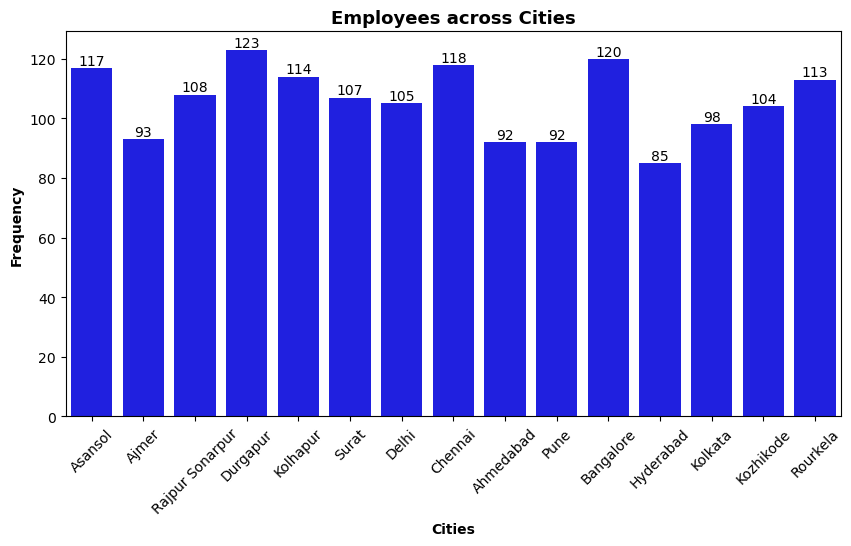

In [34]:
plt.figure(figsize=(10,5))
ax = sns.countplot( x = 'city' , data = emp_data, color = 'blue')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title('Employees across Cities', fontsize = 13, fontweight="bold")
plt.xlabel('Cities', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

In [35]:
print(emp_data['state'].value_counts())

West Bengal    446
Maharashtra    206
Karnataka      120
Tamil Nadu     118
Odisha         113
NA             107
Delhi          105
Kerala         104
Rajasthan       93
Gujarat         92
Telangana       85
Name: state, dtype: int64


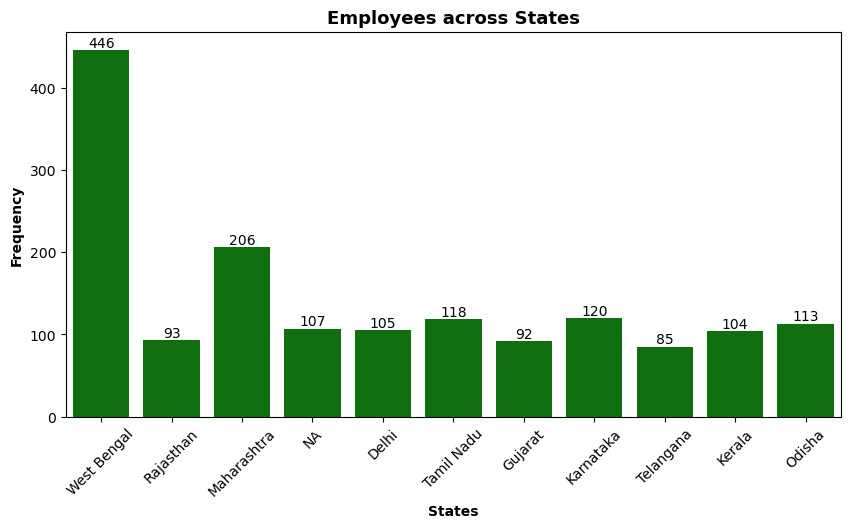

In [38]:
plt.figure(figsize=(10,5))
ax = sns.countplot( x = 'state' , data = emp_data, color = 'green')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title('Employees across States', fontsize = 13, fontweight="bold")
plt.xlabel('States', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

In [40]:
role = emp_data['role'].value_counts()
role

Executive    1261
Manager       328
Name: role, dtype: int64

In [41]:
role_percent = round((role/emp_data.shape[0])*100,2)
role_percent

Executive    79.36
Manager      20.64
Name: role, dtype: float64

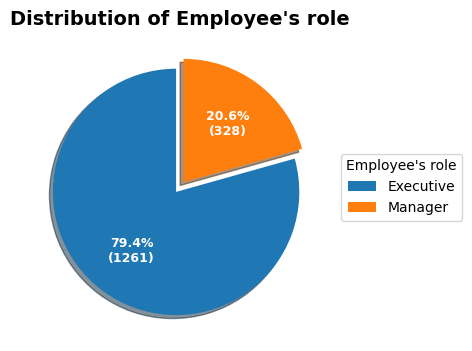

In [44]:
fig, ax = plt.subplots(figsize=[12,4])

labels = role.index
data = role.values

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

wedges, texts, autopcts = ax.pie(x= data, 
                        autopct=lambda pct: func(pct, data),
                        explode=[0.05]*len(role_percent),
                        shadow=True,
                        startangle = 90
                        )
# Adding legend
ax.legend(wedges, labels,
          title ="Employee's role",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':9})
plt.title("Distribution of Employee's role", fontsize=14, fontweight="bold");

In [48]:
job_changes = emp_data['previous_job_change'].value_counts()
job_changes

3    418
4    409
1    396
2    366
Name: previous_job_change, dtype: int64

In [49]:
job_changes_percent = round((job_changes/emp_data.shape[0])*100,2)
job_changes_percent

3    26.31
4    25.74
1    24.92
2    23.03
Name: previous_job_change, dtype: float64

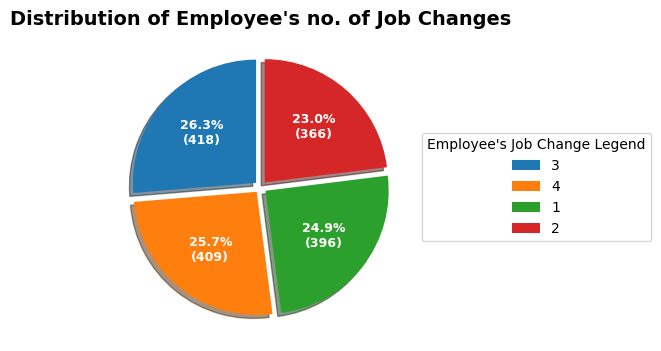

In [50]:
fig, ax = plt.subplots(figsize=[12,4])

labels = job_changes.index
data = job_changes.values

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

wedges, texts, autopcts = ax.pie(x= data, 
                        autopct=lambda pct: func(pct, data),
                        explode=[0.05]*len(job_changes_percent),
                        shadow=True,
                        startangle = 90
                        )
# Adding legend
ax.legend(wedges, labels,
          title ="Employee's Job Change Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':9})
plt.title("Distribution of Employee's no. of Job Changes", fontsize=14, fontweight="bold");

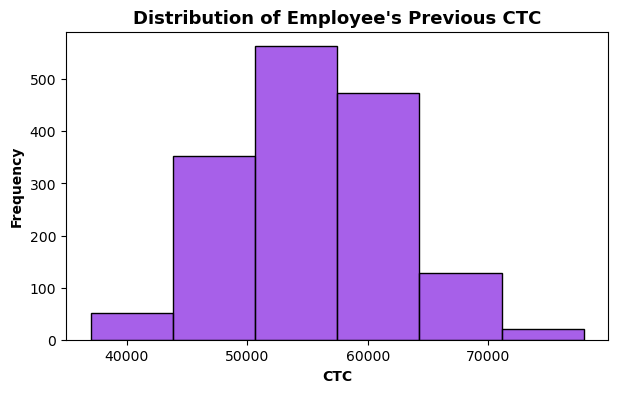

In [45]:
plt.figure(figsize=(7,4))
sns.histplot( x = 'previous_ctc' , data = emp_data, bins = 6, color= 'blueviolet')
plt.title("Distribution of Employee's Previous CTC", fontsize = 13, fontweight="bold")
plt.xlabel('CTC', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

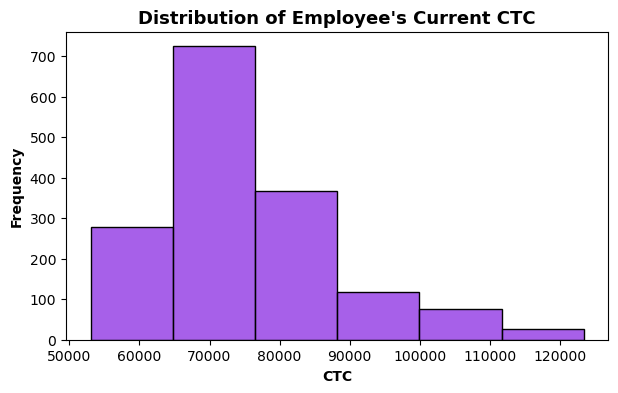

In [46]:
plt.figure(figsize=(7,4))
sns.histplot( x = 'ctc' , data = emp_data, bins = 6, color= 'blueviolet')
plt.title("Distribution of Employee's Current CTC", fontsize = 13, fontweight="bold")
plt.xlabel('CTC', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

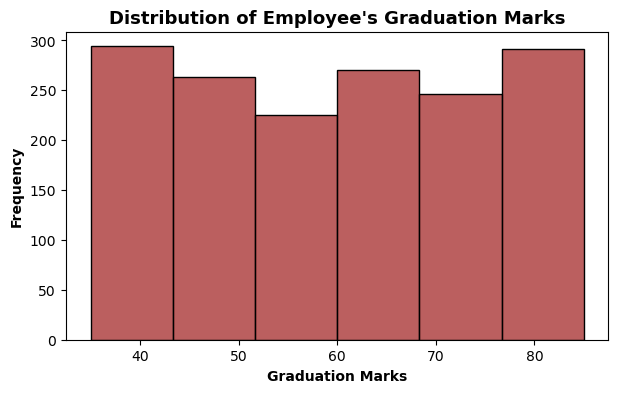

In [52]:
plt.figure(figsize=(7,4))
sns.histplot( x = 'graduation_marks' , data = emp_data, bins = 6, color= 'brown')
plt.title("Distribution of Employee's Graduation Marks", fontsize = 13, fontweight="bold")
plt.xlabel('Graduation Marks', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

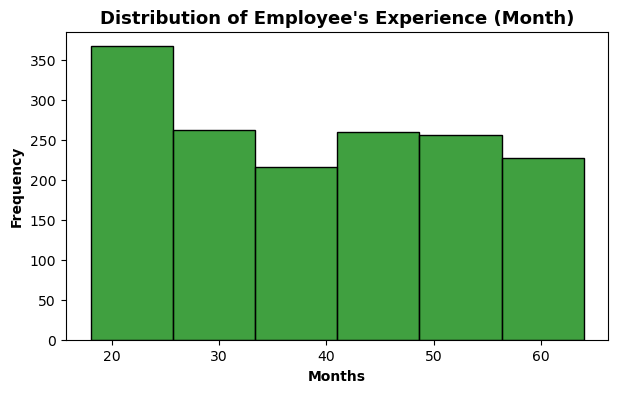

In [53]:
plt.figure(figsize=(7,4))
sns.histplot( x = 'exp_(month)' , data = emp_data, bins = 6, color= 'green')
plt.title("Distribution of Employee's Experience (Month)", fontsize = 13, fontweight="bold")
plt.xlabel('Months', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

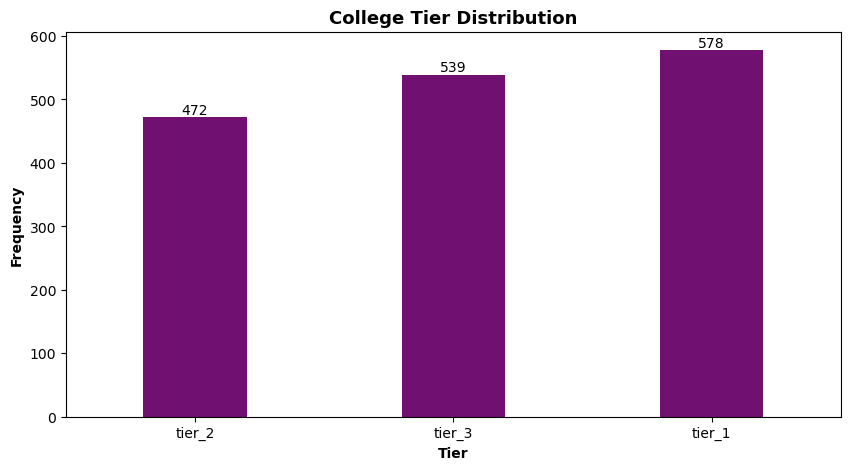

In [57]:
plt.figure(figsize=(10,5))
ax = sns.countplot( x = 'tier' , data = emp_data, color = 'purple', width = 0.4)
ax.bar_label(ax.containers[0])
plt.title('College Tier Distribution', fontsize = 13, fontweight="bold")
plt.xlabel('Tier', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

In [56]:
emp_data['city_if_metro'].value_counts()

metro_city        817
non_metro_city    772
Name: city_if_metro, dtype: int64

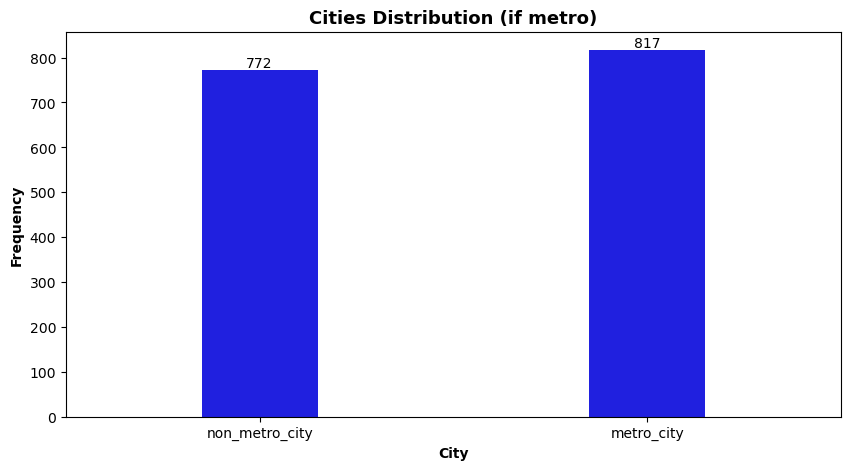

In [59]:
plt.figure(figsize=(10,5))
ax = sns.countplot( x = 'city_if_metro' , data = emp_data, color = 'blue', width = 0.3)
ax.bar_label(ax.containers[0])
plt.title('Cities Distribution (if metro)', fontsize = 13, fontweight="bold")
plt.xlabel('City', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

In [66]:
emp_data.head()

,college,city,state,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier,city_if_metro
0,SVNIT Surat,Asansol,West Bengal,Manager,55523.0,3,66,19,71406.58,tier_2,non_metro_city
1,NIT Bhopal,Ajmer,Rajasthan,Executive,57081.0,1,84,18,68005.87,tier_2,non_metro_city
2,"IEM, Kolkata",Rajpur Sonarpur,West Bengal,Executive,60347.0,2,52,28,76764.02,tier_3,non_metro_city
3,"KIIT, Bhubaneswar",Ajmer,Rajasthan,Executive,49010.0,2,81,33,82092.39,tier_3,non_metro_city
4,DTU,Durgapur,West Bengal,Executive,57879.0,4,74,32,73878.10,tier_1,non_metro_city


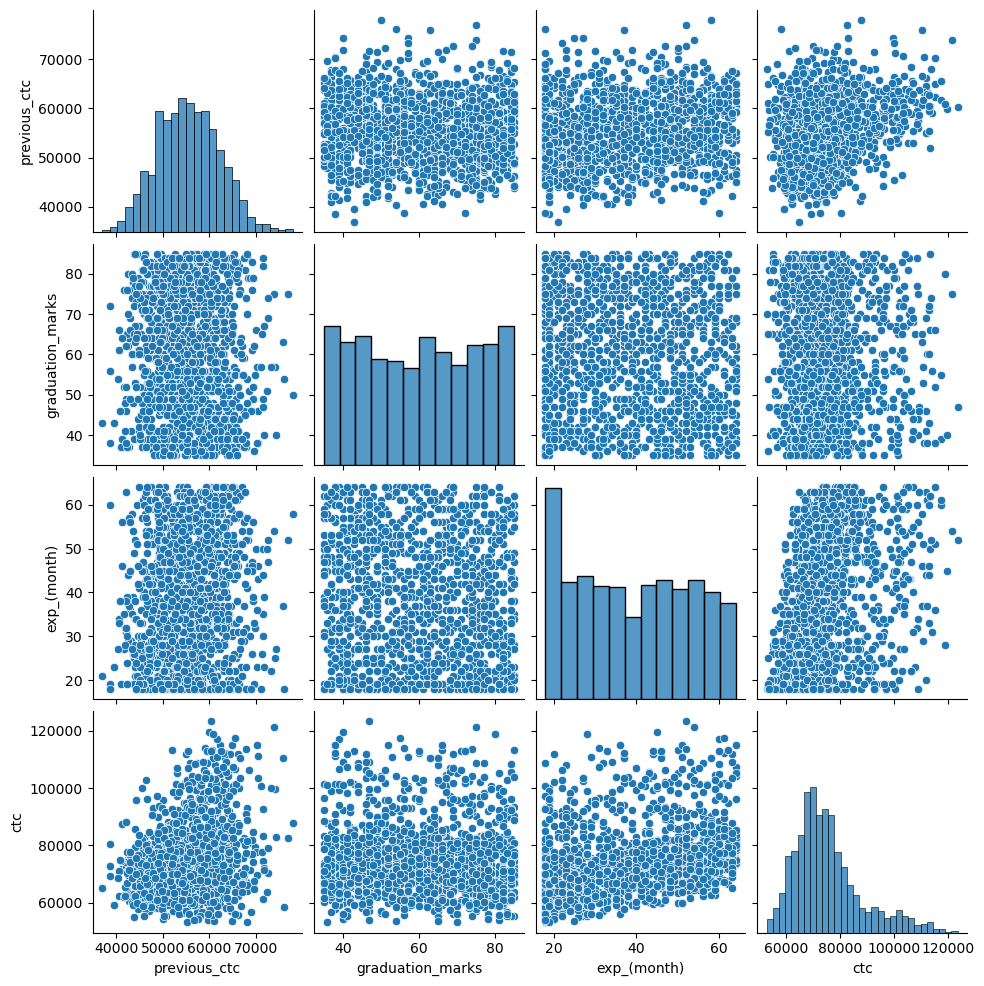

In [67]:
# pairwise scatter plot of the dataset columns
numerical_cols = ['previous_ctc', 'graduation_marks','exp_(month)', 'ctc']
sns.pairplot(emp_data[numerical_cols]);

### Data Pre-processing - Removing non-required columns and transforming other columns

In [101]:
emp_data_preprocess = emp_data.copy(deep=True)   # keeping the original copy of the data safe

In [102]:
emp_data_preprocess.head()

,college,city,state,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier,city_if_metro
0,SVNIT Surat,Asansol,West Bengal,1,55523.0,3,66,19,71406.58,tier_2,non_metro_city
1,NIT Bhopal,Ajmer,Rajasthan,0,57081.0,1,84,18,68005.87,tier_2,non_metro_city
2,"IEM, Kolkata",Rajpur Sonarpur,West Bengal,0,60347.0,2,52,28,76764.02,tier_3,non_metro_city
3,"KIIT, Bhubaneswar",Ajmer,Rajasthan,0,49010.0,2,81,33,82092.39,tier_3,non_metro_city
4,DTU,Durgapur,West Bengal,0,57879.0,4,74,32,73878.10,tier_1,non_metro_city


In [103]:
#dropping the columns since this information is already present in another form in the dataset
cols_to_drop = ['college','city', 'state']
emp_data_preprocess.drop(cols_to_drop, axis = 1, inplace=True)  

In [104]:
emp_data_preprocess.head()

,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier,city_if_metro
0,1,55523.0,3,66,19,71406.58,tier_2,non_metro_city
1,0,57081.0,1,84,18,68005.87,tier_2,non_metro_city
2,0,60347.0,2,52,28,76764.02,tier_3,non_metro_city
3,0,49010.0,2,81,33,82092.39,tier_3,non_metro_city
4,0,57879.0,4,74,32,73878.10,tier_1,non_metro_city


In [105]:
# encoding "role", 'city_if_metro' column

emp_data_preprocess['role'] = emp_data_preprocess['role'].apply(lambda x: 0 if x == 'Executive' else 1)
emp_data_preprocess['city_if_metro'] = emp_data_preprocess['city_if_metro'].apply(lambda x: 0 if x == 'non_metro_city' else 1)

In [106]:
emp_data_preprocess.head()

,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier,city_if_metro
0,1,55523.0,3,66,19,71406.58,tier_2,0
1,0,57081.0,1,84,18,68005.87,tier_2,0
2,0,60347.0,2,52,28,76764.02,tier_3,0
3,0,49010.0,2,81,33,82092.39,tier_3,0
4,0,57879.0,4,74,32,73878.10,tier_1,0


In [107]:
# encoding "tier"

def encode_tier(value):
    key = {
        'tier_1':1,
        'tier_2':2,
        'tier_3':3
    }
    return key[value]

emp_data_preprocess['tier'] = emp_data_preprocess['tier'].apply(lambda x: encode_tier(x))
emp_data_preprocess.head()

,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier,city_if_metro
0,1,55523.0,3,66,19,71406.58,2,0
1,0,57081.0,1,84,18,68005.87,2,0
2,0,60347.0,2,52,28,76764.02,3,0
3,0,49010.0,2,81,33,82092.39,3,0
4,0,57879.0,4,74,32,73878.10,1,0


### Correlation analysis using Heatmap

In [108]:
emp_data_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   role                 1589 non-null   int64  
 1   previous_ctc         1589 non-null   float64
 2   previous_job_change  1589 non-null   int64  
 3   graduation_marks     1589 non-null   int64  
 4   exp_(month)          1589 non-null   int64  
 5   ctc                  1589 non-null   float64
 6   tier                 1589 non-null   int64  
 7   city_if_metro        1589 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 99.4 KB


In [109]:
# getting correlation of the data columns with each other

corr_data = emp_data_preprocess.corr().round(2)
corr_data

,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier,city_if_metro
role,1.00,0.01,-0.02,0.02,-0.03,0.62,-0.01,-0.05
previous_ctc,0.01,1.00,0.01,-0.03,0.12,0.26,0.04,0.00
previous_job_change,-0.02,0.01,1.00,0.02,0.02,0.01,-0.06,0.05
graduation_marks,0.02,-0.03,0.02,1.00,-0.06,-0.01,0.00,-0.02
exp_(month),-0.03,0.12,0.02,-0.06,1.00,0.30,0.01,-0.02
ctc,0.62,0.26,0.01,-0.01,0.30,1.00,-0.03,-0.02
tier,-0.01,0.04,-0.06,0.00,0.01,-0.03,1.00,-0.01
city_if_metro,-0.05,0.00,0.05,-0.02,-0.02,-0.02,-0.01,1.00


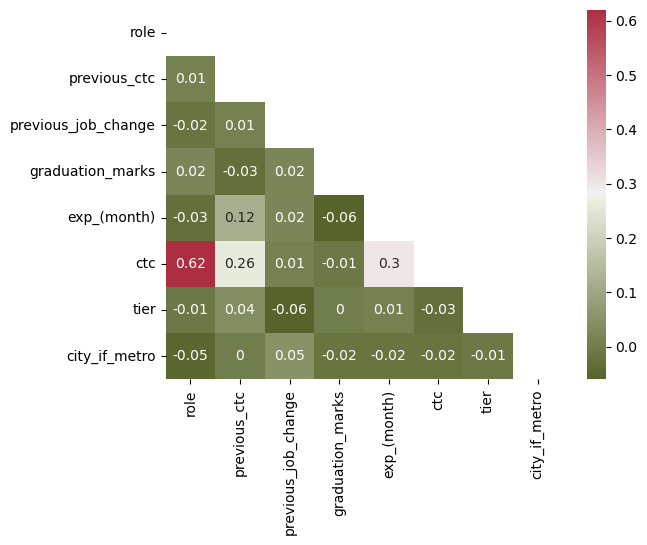

In [110]:
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(np.ones_like(corr_data))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

# using the upper triangle matrix as mask 
sns.heatmap(corr_data, annot=True, mask=matrix, cmap=cmap);

### Outlier Detection and Treatment

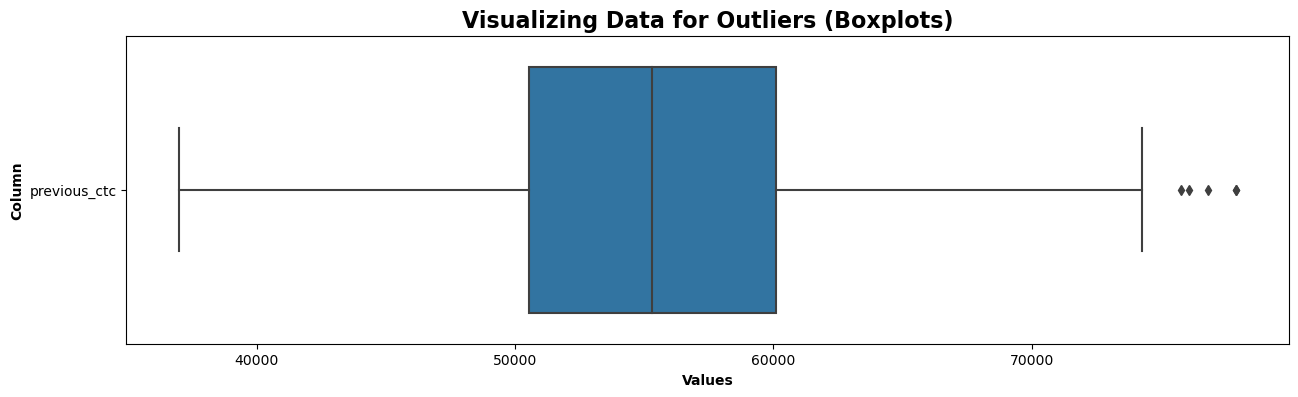

In [112]:
plt.figure(figsize=(15,4))

sns.boxplot(data = emp_data_preprocess[['previous_ctc']], orient='h');
plt.title('Visualizing Data for Outliers (Boxplots)', fontsize = 16, fontweight="bold")
plt.xlabel('Values', fontweight="bold")
plt.ylabel('Column', fontweight="bold")
plt.show()

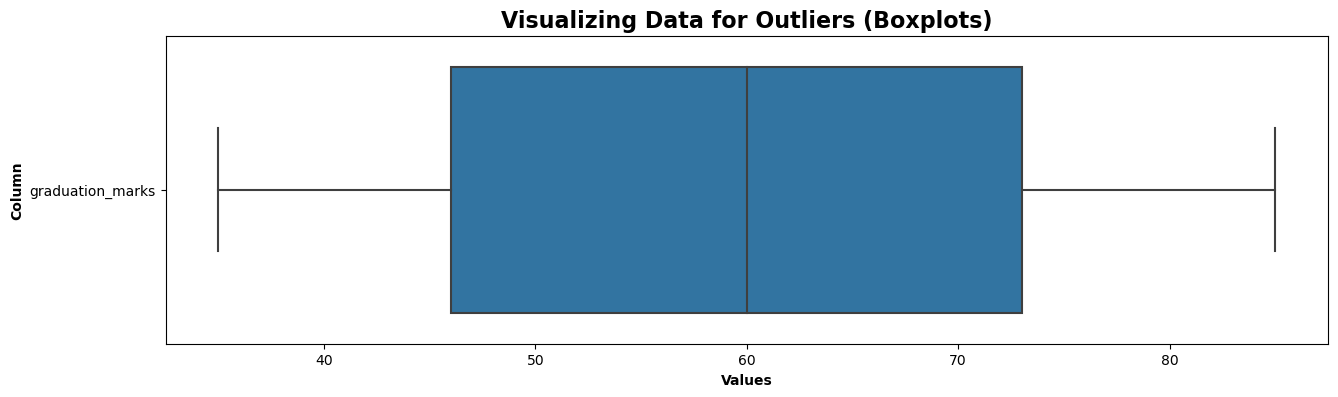

In [113]:
plt.figure(figsize=(15,4))

sns.boxplot(data = emp_data_preprocess[['graduation_marks']], orient='h');
plt.title('Visualizing Data for Outliers (Boxplots)', fontsize = 16, fontweight="bold")
plt.xlabel('Values', fontweight="bold")
plt.ylabel('Column', fontweight="bold")
plt.show()

In [115]:
def find_outliers_stats(col, df):
    """
    This function calculates the outlier in the given column and returns the outlier count and corresponding percent.
    To aid decision making on how to treat outliers
    """
    
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    
    iqr = percentile75 - percentile25
    
    upper_limit = percentile75 + (1.5 * iqr)
    lower_limit = percentile25 - (1.5 * iqr)
    
    outliers_count = len(df[df[col] > upper_limit]) + len(df[df[col] < lower_limit])
    outliers_percent = round((outliers_count/df.shape[0])*100,2)
    
    return outliers_count, outliers_percent

In [116]:
find_outliers_stats('previous_ctc', emp_data_preprocess)

(5, 0.31)

##### there are 5 outlier points present in column "previous_ctc", which consititues about 0.3%

In [119]:
def impute_outliers(column):
    """
    This function calculates and imputes the outliers
    """
    
    percentile25 = column.quantile(0.25)
    percentile75 = column.quantile(0.75)
    
    iqr = percentile75 - percentile25
    
    upper_limit = percentile75 + (1.5 * iqr)
    lower_limit = percentile25 - (1.5 * iqr)
    
    column[column > upper_limit] = upper_limit
    column[column < lower_limit] = lower_limit
    
    return column

In [121]:
emp_data_preprocess['previous_ctc'] = impute_outliers(emp_data_preprocess['previous_ctc'])

C:\Users\Luvkush\AppData\Local\Temp\ipykernel_6624\1711242409.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > upper_limit] = upper_limit
C:\Users\Luvkush\AppData\Local\Temp\ipykernel_6624\1711242409.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < lower_limit] = lower_limit


##### outliers in the column "previous_ctc" have been capped to upper and lower limit values based on IQR. Below is the Boxplot to confirm that outliers have been treated

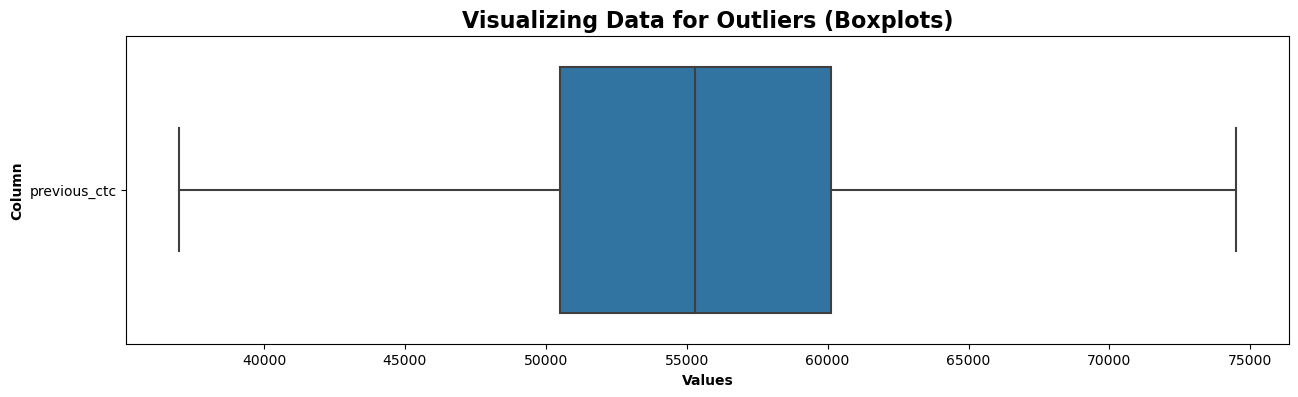

In [122]:
plt.figure(figsize=(15,4))

sns.boxplot(data = emp_data_preprocess[['previous_ctc']], orient='h');
plt.title('Visualizing Data for Outliers (Boxplots)', fontsize = 16, fontweight="bold")
plt.xlabel('Values', fontweight="bold")
plt.ylabel('Column', fontweight="bold")
plt.show()

### Data Modelling: Statsmodels Linear Regression

In [124]:
emp_data_preprocess.head()

,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier,city_if_metro
0,1,55523.0,3,66,19,71406.58,2,0
1,0,57081.0,1,84,18,68005.87,2,0
2,0,60347.0,2,52,28,76764.02,3,0
3,0,49010.0,2,81,33,82092.39,3,0
4,0,57879.0,4,74,32,73878.10,1,0


In [133]:
emp_data_preprocess = emp_data_preprocess.rename(columns={'exp_(month)':'exp_month'})
emp_data_preprocess.head()

,role,previous_ctc,previous_job_change,graduation_marks,exp_month,ctc,tier,city_if_metro
0,1,55523.0,3,66,19,71406.58,2,0
1,0,57081.0,1,84,18,68005.87,2,0
2,0,60347.0,2,52,28,76764.02,3,0
3,0,49010.0,2,81,33,82092.39,3,0
4,0,57879.0,4,74,32,73878.10,1,0


In [134]:
cols = emp_data_preprocess.columns.to_list()
cols.remove('ctc')
print(cols)

['role', 'previous_ctc', 'previous_job_change', 'graduation_marks', 'exp_month', 'tier', 'city_if_metro']


In [135]:
cols = '+'.join(cols)
print(cols)

role+previous_ctc+previous_job_change+graduation_marks+exp_month+tier+city_if_metro


In [136]:
formula = "ctc ~ "+cols
print(formula)

ctc ~ role+previous_ctc+previous_job_change+graduation_marks+exp_month+tier+city_if_metro


In [137]:
ols_model = ols(formula=formula, data = emp_data_preprocess).fit()

In [138]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ctc   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Fri, 09 Aug 2024   Prob (F-statistic):          4.98e-257
Time:                        22:02:24   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.835e+04   2197.503     17.453      0.000     3.4e+04    4.27e+04
role                 1.949e+04    534.716     36.441      0.000    1.84e+04    2.05e+04
previous_ctc            0.4114      0.033     12.521      0.000       0.347       0.476
previous_job_change   125.1353    192.895      0.649      0.517    -253.221     503.491
graduation_marks        6.2224     14.502      0.429      0.668     -22.223      34.668
exp_month             261.4388     15.460     16.911      0.000     231.115     291.763
tier                 -482.1257    258.393     -1.866      0.062    -988.955      24.703
city_if_metro         385.3028    433.468      0.889      0.374    -464.930    1235.536
==============================================================================
Omnibus:                       49.607   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.133
Skew:                           0.408   Prob(JB):                     1.07e-12
Kurtosis:                       3.409   Cond. No.                     5.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Splitting th dataset into training and testing sets

In [139]:
emp_data_preprocess.head()

,role,previous_ctc,previous_job_change,graduation_marks,exp_month,ctc,tier,city_if_metro
0,1,55523.0,3,66,19,71406.58,2,0
1,0,57081.0,1,84,18,68005.87,2,0
2,0,60347.0,2,52,28,76764.02,3,0
3,0,49010.0,2,81,33,82092.39,3,0
4,0,57879.0,4,74,32,73878.10,1,0


In [145]:
# changing the data types of 'previous_job_change' & 'tier' to categories (since they have non binary values)

emp_data_preprocess['previous_job_change'] = pd.Categorical(emp_data_preprocess['previous_job_change'])
emp_data_preprocess['tier'] = pd.Categorical(emp_data_preprocess['tier'], categories=[3,2,1], ordered=True)

In [146]:
emp_data_preprocess.head()

,role,previous_ctc,previous_job_change,graduation_marks,exp_month,ctc,tier,city_if_metro
0,1,55523.0,3,66,19,71406.58,2,0
1,0,57081.0,1,84,18,68005.87,2,0
2,0,60347.0,2,52,28,76764.02,3,0
3,0,49010.0,2,81,33,82092.39,3,0
4,0,57879.0,4,74,32,73878.10,1,0


In [147]:
emp_data_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   role                 1589 non-null   int64   
 1   previous_ctc         1589 non-null   float64 
 2   previous_job_change  1589 non-null   category
 3   graduation_marks     1589 non-null   int64   
 4   exp_month            1589 non-null   int64   
 5   ctc                  1589 non-null   float64 
 6   tier                 1589 non-null   category
 7   city_if_metro        1589 non-null   int64   
dtypes: category(2), float64(2), int64(4)
memory usage: 78.0 KB


In [149]:
X = emp_data_preprocess.drop('ctc',axis = 1)
y = emp_data_preprocess['ctc']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [152]:
print(f'X_train Shape: {X_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (1271, 7)
X_test Shape: (318, 7)
y_train Shape: (1271,)
y_test Shape: (318,)


### Standardization

In [154]:
scaler = StandardScaler()

In [155]:
scaler.fit(X_train)

StandardScaler()

In [156]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [157]:
print(X_train_scaled[:5])

[[ 1.94375808  0.96025192  1.2989364  -0.43182374  0.85446799  0.03763566
   0.96368035]
 [-0.51446731 -0.98691572  1.2989364   0.50363665 -1.40809204  1.23350886
  -1.03768848]
 [-0.51446731 -0.44944161  0.40749571 -1.63455853 -0.63033703 -1.15823753
   0.96368035]
 [-0.51446731 -0.39754547  1.2989364   1.37227844  0.07671298  1.23350886
   0.96368035]
 [-0.51446731 -1.18175388  1.2989364   0.57045525  0.99587799  0.03763566
  -1.03768848]]


In [158]:
print(X_test_scaled[:5])

[[ 1.94375808 -0.90087738 -1.37538568  1.50591564 -0.48892703 -1.15823753
  -1.03768848]
 [ 1.94375808 -0.01060053  0.40749571  0.57045525  0.57164799  1.23350886
  -1.03768848]
 [-0.51446731  1.04659375  1.2989364  -1.36728413 -0.84245203  1.23350886
  -1.03768848]
 [-0.51446731 -0.55626877 -1.37538568  0.50363665 -0.20610702  0.03763566
  -1.03768848]
 [-0.51446731 -1.43121956 -1.37538568  1.63955284 -1.19597704  1.23350886
   0.96368035]]


### Examining the appropriate (baseline) model using DABL

In [161]:
emp_data_preprocess.head()

,role,previous_ctc,previous_job_change,graduation_marks,exp_month,ctc,tier,city_if_metro
0,1,55523.0,3,66,19,71406.58,2,0
1,0,57081.0,1,84,18,68005.87,2,0
2,0,60347.0,2,52,28,76764.02,3,0
3,0,49010.0,2,81,33,82092.39,3,0
4,0,57879.0,4,74,32,73878.10,1,0


In [162]:
ref_model = dabl.SimpleRegressor(random_state=101).fit(emp_data_preprocess, target_col="ctc") 
ref_model

C:\Users\Luvkush\anaconda3\envs\ML_env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Luvkush\anaconda3\envs\ML_env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Luvkush\anaconda3\envs\ML_env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Luvkush\anaconda3\envs\ML_env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sp

Running DummyRegressor()
r2: -0.004 neg_mean_squared_error: -158557992.379
=== new best DummyRegressor() (using r2):
r2: -0.004 neg_mean_squared_error: -158557992.379

Running DecisionTreeRegressor(max_depth=1, random_state=101)
r2: 0.382 neg_mean_squared_error: -97572280.750
=== new best DecisionTreeRegressor(max_depth=1, random_state=101) (using r2):
r2: 0.382 neg_mean_squared_error: -97572280.750

Running DecisionTreeRegressor(max_leaf_nodes=8, random_state=101)
r2: 0.579 neg_mean_squared_error: -66390913.538
=== new best DecisionTreeRegressor(max_leaf_nodes=8, random_state=101) (using r2):
r2: 0.579 neg_mean_squared_error: -66390913.538

Running DecisionTreeRegressor(max_leaf_nodes=16, random_state=101)
r2: 0.567 neg_mean_squared_error: -68273987.550
Running DecisionTreeRegressor(max_leaf_nodes=32, random_state=101)
r2: 0.555 neg_mean_squared_error: -70151215.384
Running DecisionTreeRegressor(max_depth=5, random_state=101)
r2: 0.569 neg_mean_squared_error: -68010695.984
Running Rid

C:\Users\Luvkush\anaconda3\envs\ML_env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


SimpleRegressor(random_state=101)

In [164]:
def ML_model_regressor(model, X_train, X_test, y_train, y_test, verbose=0):
    
    """
    This function takes the model, training and test datasets and will return the training and testing r2 values
    """
    
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_r2 = round((r2_score(y_train, y_pred_train)*100),2)
    test_r2 = round((r2_score(y_test, y_pred_test)*100),2)
    
    if verbose:
        print(f'Model: {model}')
        print(f'Training Accuracy: {train_r2}')
        print(f'Test Accuracy: {test_r2}')
    
    return model, train_r2, test_r2

In [165]:
# Running LinearRegression model

reggressor = LinearRegression()
model, train_acc, test_acc = ML_model_regressor(reggressor, X_train_scaled, X_test_scaled, y_train, y_test, verbose = 1)

Model: LinearRegression()
Training Accuracy: 52.63
Test Accuracy: 56.2


In [166]:
# Running KNeighborsRegressor model

reggressor = KNeighborsRegressor()
model, train_acc, test_acc = ML_model_regressor(reggressor, X_train_scaled, X_test_scaled, y_train, y_test, verbose = 1)

Model: KNeighborsRegressor()
Training Accuracy: 68.15
Test Accuracy: 52.65


In [167]:
# Running DecisionTreeRegressor model

reggressor = DecisionTreeRegressor()
model, train_acc, test_acc = ML_model_regressor(reggressor, X_train_scaled, X_test_scaled, y_train, y_test, verbose = 1)

Model: DecisionTreeRegressor()
Training Accuracy: 100.0
Test Accuracy: 41.97


In [168]:
# Running RandomForestRegressor model

reggressor = RandomForestRegressor()
model, train_acc, test_acc = ML_model_regressor(reggressor, X_train_scaled, X_test_scaled, y_train, y_test, verbose = 1)

Model: RandomForestRegressor()
Training Accuracy: 94.77
Test Accuracy: 67.13


In [170]:
# Running the data with XGBoost Classifier

reggressor = xgb.XGBRegressor()
model, train_acc, test_acc = ML_model_regressor(reggressor, X_train_scaled, X_test_scaled, y_train, y_test, verbose = 1)

Model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)
Training Accuracy: 98.49
Test Accuracy: 64.88


##### RandomForestRegressor is by far the best model.

### Best Model Selection and Optimization

In [172]:
# Defining function to return the MAPE (Mean Absolute Percent Error)

def get_mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [173]:
# defining a single function to get all required metrics of regression, to avoid writing it again and again

def regression_metrics(actual, predicted):
    
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = get_mape(actual, predicted)
    r_squared = r2_score(actual, predicted)
    
    return round(mae,2), round(mse,2), round(rmse,2), round(mape,2), round(r_squared, 2)
    


In [181]:
rf_regressor = RandomForestRegressor(n_jobs=-1)

params = {
    'n_estimators': [100,200,300,500],
    'max_depth': [10, 20, 30, 40],
    'min_samples_leaf': [2,7,12,25],
}

In [182]:
# Instantiate the grid search model

grid_search = GridSearchCV(estimator=rf_regressor,
                           param_grid=params_2,
                           cv = 10,
                           n_jobs=-1, verbose=3, scoring="r2", return_train_score=True)

In [183]:
grid_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [2, 5],
                         'n_estimators': [150, 200]},
             return_train_score=True, scoring='r2', verbose=3)

In [184]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [185]:
grid_search.cv_results_['mean_train_score'][:10]

array([0.86312715, 0.86329323, 0.78323399, 0.78350159, 0.90653349,
       0.9066171 , 0.79479353, 0.79544331])

In [186]:
grid_cv_scores = pd.DataFrame([grid_search.cv_results_['mean_train_score'], grid_search.cv_results_['mean_test_score']]).T
grid_cv_scores.columns = ['mean_train_score', 'mean_test_score']
grid_cv_scores.head(7)

,mean_train_score,mean_test_score
0,0.863127,0.602226
1,0.863293,0.603975
2,0.783234,0.591947
3,0.783502,0.593178
4,0.906533,0.600011
5,0.906617,0.601582
6,0.794794,0.594022


In [187]:
grid_search.best_score_

0.6039748462307731

In [188]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}


In [189]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=200,
                      n_jobs=-1)

In [190]:
rf_best.fit(X_train_scaled, y_train)

y_pred_train = rf_best.predict(X_train_scaled)
y_pred_test = rf_best.predict(X_test_scaled)

In [192]:
mae, mse, rmse, mape, r_squared = regression_metrics(y_train, y_pred_train)

In [193]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percent Error: {mape}%')
print(f'R Squared: {r_squared}')

Mean Absolute Error: 3625.82
Mean Squared Error: 21904232.6
Root Mean Squared Error: 4680.2
Mean Absolute Percent Error: 4.92%
R Squared: 0.86


In [194]:
mae, mse, rmse, mape, r_squared = regression_metrics(y_test, y_pred_test)

In [195]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percent Error: {mape}%')
print(f'R Squared: {r_squared}')

Mean Absolute Error: 5987.62
Mean Squared Error: 56538574.15
Root Mean Squared Error: 7519.21
Mean Absolute Percent Error: 8.0%
R Squared: 0.66


- ##### RandomForestRegressor('max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200) is the best model obtained, with has MAPE of 5% and 8% in training and testing set respectively
- ##### R2 values are 86% and 66% in training and testing set respectively, which indicates that there is overfitting symptoms in the model. This can be treated further by gathering more attributes of the data.

### Answers to additional questions

##### 1. Your views about the problem statement?


##### Answer: Since the dataset is about prediction of the salary of newly joined employees, and the historical data contains features and corresponding labels (CTC), this is a "Supervised Regression" Machine Learning problem.

##### 2. What will be your approach to solving this task?


##### Answer: The basic approach is to validate the data for any inconsistancies, pre-process the data to convert the strings into corresponding numerical format, and then apply machine learning regression models. 
##### I have used geopy library for further pre-processing. Also, I have used DABL library in order to know the baseline models to start with. 

##### 3. What were the available ML model options you had to perform this task?


##### Answer: Since this is a regression task, I have started with a baseline model using DABL. DABL results showed that DecisionTreeRegressor can be the best model for the dataset we have. Then, I selected these popular models - LinearRegression, KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor, XGBRegressor. RandomForestRegressor & XGBRegressor almost gave same R2 value, so I selected optimied RandomForestRegressor via Grid Search to opt for the best model.

##### 4. Which model’s performance is best and what could be the possible reason for that?


##### Answer: RandomForestRegressor & XGBRegressor gave best performance in my case, and the reason could be that they are based on ensemble techniques where set of weak learners collectively work to give out the best model. RandomForestRegressor was the final model I have selected for this problem statement and this was further optimized with gridsearchcv.

##### 5. What steps can you take to improve this selected model’s performance even further?

##### Answer: GridSearchCV library was used for hyperparameter tuning of the best model RandomForestRegressor. Set of regression metrics were used such as MSE, MAPE, R2 etc to validate the model performance of both, training and testing set.

<center> <h3> End of the Project </h3> </center>